In [2]:
print('Welcome to California Housing Price Estimation Machine learning Model')

Welcome to California Housing Price Estimation Machine learning Model


In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# The Structure of Machine Learning Project


1.   Look at the big picture
2.   Get the data
3.   Explore and visualize the data for insights
4.   Preprocessing the data
5.   Model selection and training
6.   Fine tune the model
7.   Solution insights
8.   Launch, monitor and maintain the Model

# Look at the Big Picture

The task of this project is to predict the median housing price in any district in the California.

US Census Bureau has published the data for each block (district) in California. The important metrics included in the data for each block are:

* Population
* Median house income
* Median house price
* Households
* Total bedrooms


There are two performance metrics we will address:

* Root mean sqaure error (RMSE)
* Mean absolute error (MSE)





# Get the Data

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def get_house_data():
  # Check whether the file exist or not
  data_path = Path('datasets/housing/housing.csv')
  if not data_path.exists():
    Path('datasets').mkdir(parents = True, exist_ok = True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, 'datasets/housing.tgz')
    housing_tarball = tarfile.open('datasets/housing.tgz')
    housing_tarball.extractall('datasets')
  
  return pd.read_csv(data_path)

In [5]:
housing = get_house_data()

In [6]:
# Taking a quick peak at the data

# Looking at the first 10 rows
housing.head(10) # remember each row is an instance of a district

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Total attributes and missing values

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* It looks like we have 08 attributes and 01 object; 'oceam_proximity'
* Total value of feature 'total_bedrooms' has some missing values
* 'ocean_proximity' has repetitive values lets look into it.

In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From the above distribution of data, we can deduce that there exist high variance for most of the feature. To have proper understanding we can plot histograms.

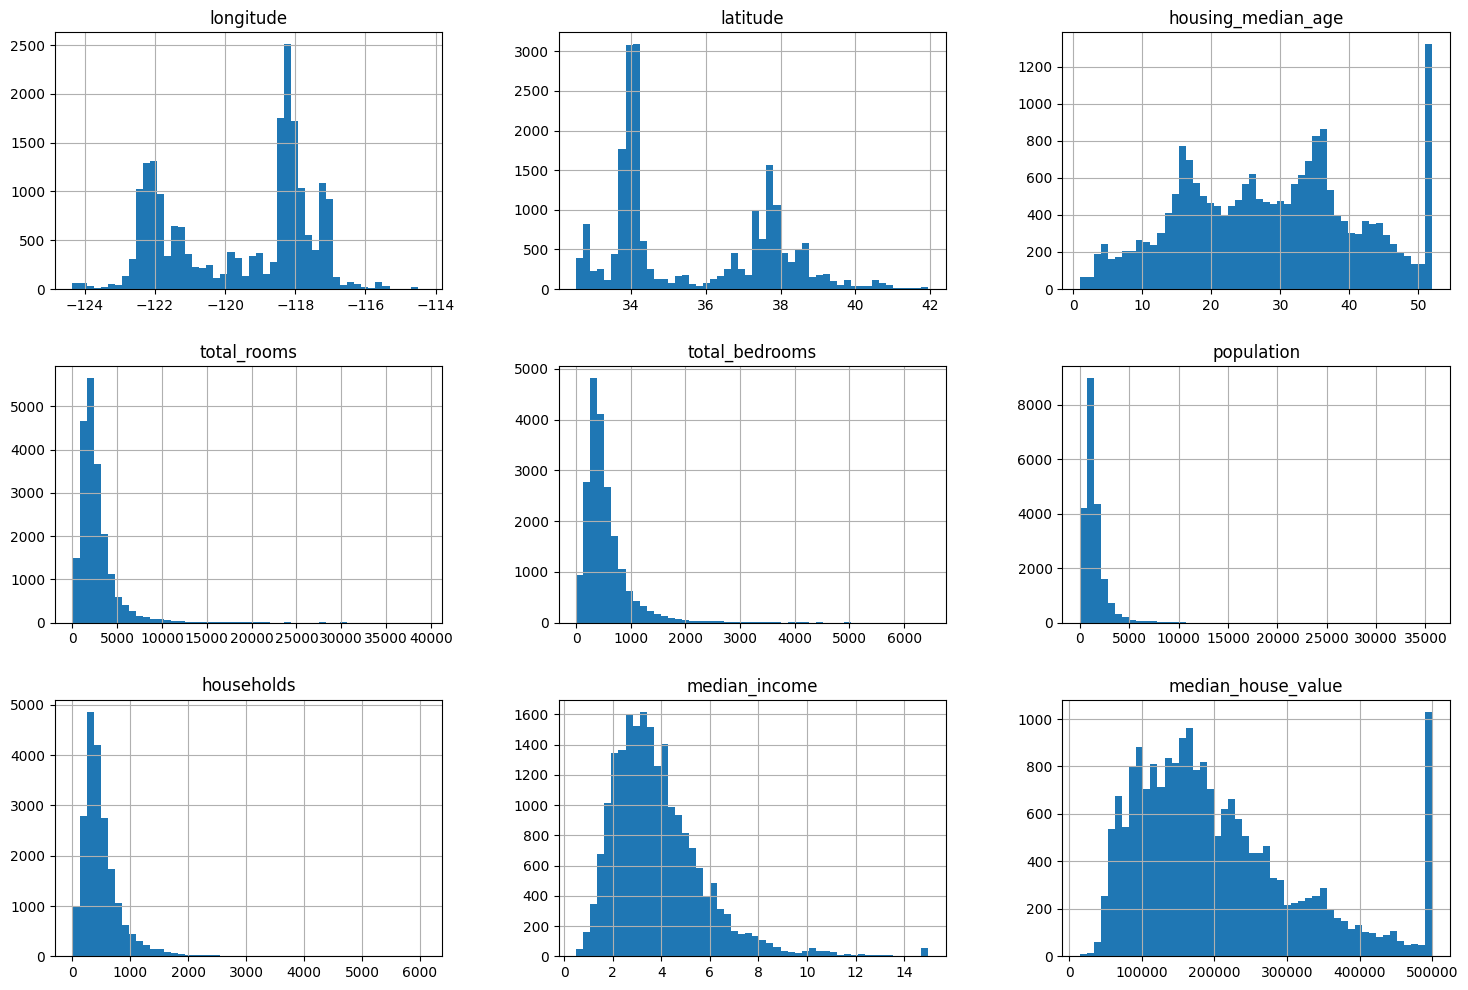

In [10]:
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize=(18, 12))
plt.show()

From going through the above histograms we can come to following conclusion.
1. The **median_income** has different scale it means, 1 represents actually $10,000.
2. Values for **median_income**, **median_house_value**, **housing_median_age** are capped.
3. All of the values at different scales, that can slow the convergence of out ML model.
4. Most the values are right-tailed or skewed-right, which creates difficulties for ML model to predict.

We need to address these issues before jumping into implementing ML model. But before that! lets split the dataset into training and validation datasets.

Note: For this ML model we will use scikit-learn.

# Create a Test Set

Creating a test datset before jumping into the ML modeling is crucial, the reason for that to avoid **underfitting(bias)** or **overfitting(variance)**. Our goal is to predict the **median_house_value** for unseen data. And if we train our model on all the data, we might be able to reduce the error, but we are not sure either this gives good results for unseen data or not? This is called **data snooping bias**.

Typically **20%** of the dataset is used for test set.

In [11]:
from sklearn.model_selection import train_test_split

To avoid significant sampling bias, stratified sampling is ensured. **median_house_income** can be important attribute thats why it has been used for stratify in the split. If we observe the histogram of **median_house_income** closly we can find the most of the values are clustered betweed 1.5 to 6, but some values go far beyond 6. We should not create too much *strata and each strata should be large enough*. For this case we will create 5 categories.

In [12]:
import numpy as np
# pandas cut() function can be used for this purpose

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3., 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


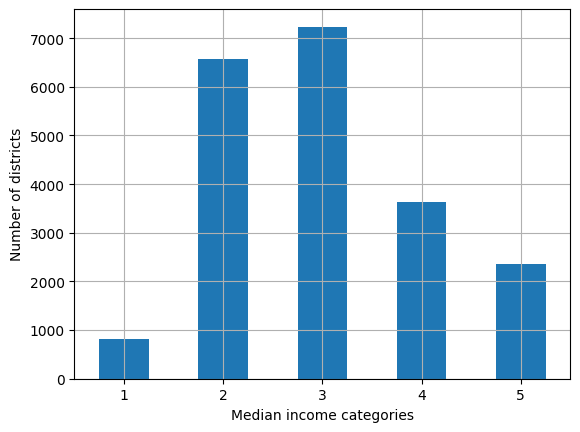

In [13]:

# This will create a bar plot to compare the values between different categories
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Median income categories')
plt.ylabel('Number of districts')
plt.show()

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2, 
                                       random_state=42)

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, 
                                       stratify=housing['income_cat'], random_state=42)


In [15]:
# Finds the proportion of categories in the datset
def income_cat_proportions(dataset):
    return dataset['income_cat'].value_counts() * 100 / len(dataset)

# DataFrame for comaprison between unstrat and strat datasets
prop_compare = pd.DataFrame({
    'Over all %' : income_cat_proportions(housing),
    'Unstrat train set %' : income_cat_proportions(train_set),
    'Unstrat test set %' : income_cat_proportions(test_set),
    'Strat train set %' : income_cat_proportions(strat_train_set),
    'Strat test set %' : income_cat_proportions(strat_test_set)
})
prop_compare['Unstrat test set error %'] = (prop_compare['Unstrat test set %'] / 
                                    prop_compare['Over all %'] - 1) * 100
prop_compare['Strat test set error %'] = (prop_compare['Strat train set %'] / 
                                    prop_compare['Over all %'] - 1) * 100

prop_compare

,Over all %,Unstrat train set %,Unstrat test set %,Strat train set %,Strat test set %,Unstrat test set error %,Strat test set error %
income_cat,,,,,,,
3,35.058140,35.192587,34.520349,35.059351,35.053295,-1.533997,0.003455
2,31.884690,32.170543,30.741279,31.885901,31.879845,-3.586081,0.003799
4,17.630814,17.435804,18.410853,17.629603,17.635659,4.424292,-0.006870
5,11.443798,11.282703,12.088178,11.446221,11.434109,5.630821,0.021169
1,3.982558,3.918362,4.239341,3.978924,3.997093,6.447689,-0.091241


From the above comparison, we can see how much unstratified split has error in proportion distribution, which eventually effects the results. 

In [16]:
# We do not need income_cat for our ML modelling
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

# Explore and Visualize the Data to Gain Insights

In [17]:
# We will create a copy of our train set to have better insight of the data
housing = strat_train_set.copy()

## Insight to geographical data

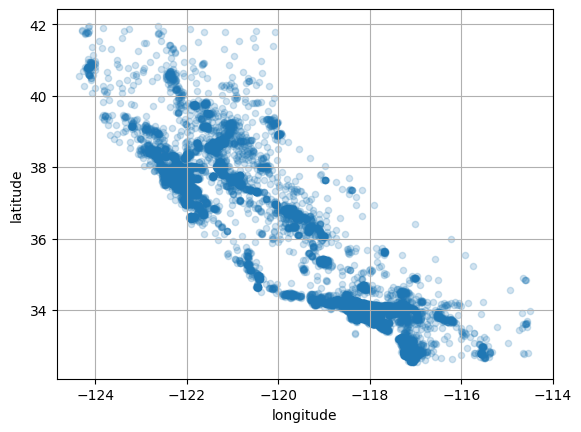

In [18]:
# Setting alpha = 0.2, will darken the areas where the density of districts is high
housing.plot(kind="scatter", x= "longitude", y = "latitude", grid = True,
             alpha = 0.2)
plt.show()

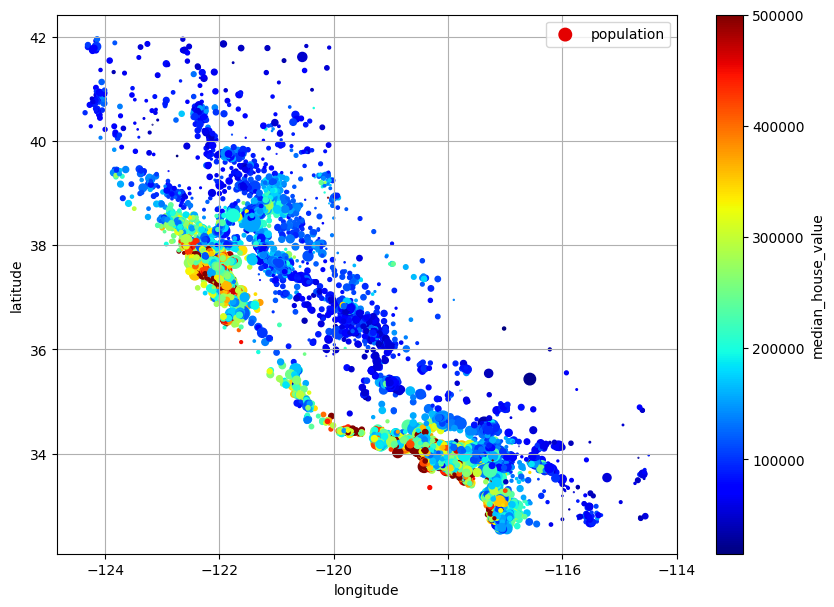

In [19]:
# To plot the median_house_value
# Size = Population of district
# Colour = Median House Price
housing.plot(kind = "scatter", x = "longitude", y = "latitude", 
              grid = True, s = housing['population'] / 100, label = "population",
              c = "median_house_value", cmap = "jet",
              colorbar = True, legend = True, figsize = (10, 7))
plt.show()

From the above nice representation, we can observe the house prices are higher near the ocean. Furthermore, higher population density can also be observerd near the ocean.

## Correlation between features and median_house_value

In [20]:
# For correlation
corr_matrix = housing.select_dtypes(include=["number"]).corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Having correlation varies from 1 to -1. 1 means highly positively correlated and -1 means higly negative correlated. We can observe, **median_income,** **total_rooms,** and **house_median_age** has positive correlation, increasing trend. However, **latitude** has negative correlation as we can also see in the graph above, when we move up to north the prices decreases. To have a better understanding we can plot a scatter plot w.r.t **median_house_value*.* 

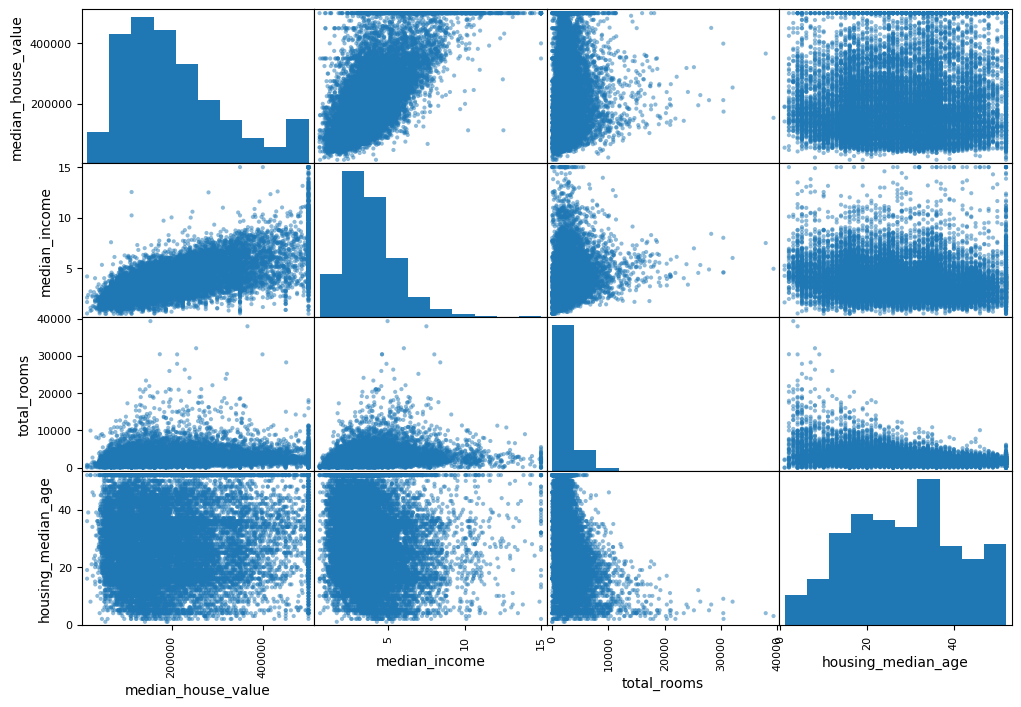

In [21]:
# Attributes to plot
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# Scatter matrix to plot create a n x n matrix
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Most promising attribute we can find is **median_income.**

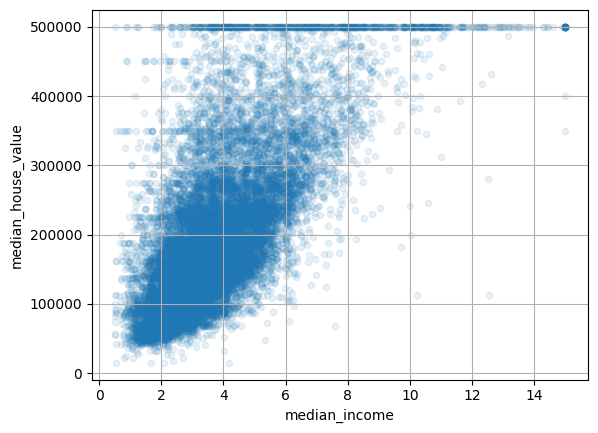

In [22]:
housing.plot(kind = 'scatter', x = 'median_income', y ='median_house_value', 
             alpha = 0.1, grid=True)
plt.show()

Here we can clearly obeserve the capping at $500,000. Furthermore, few horizontal lines at $450,000, $350,000 and at $280,000. Which can cause problem in prediction by the ML model in future. However, overall the trend is not to dispersed.

Furthermore, it is a better idea to do some feature engineering. Finding different combinations of features can help to better train the model. For example, **total_bedrooms** per district is not so much useful. however, **total_bedrooms** per **total_rooms** can be useful. Or **total_rooms** per house can also be useful same as **population** per household probably give better correlation.  

In [23]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [24]:
# Now lets took at correlation again
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

Now we can see, compared to **total_bedrooms** we have better correlation of **bedrooms_ratio**. **rooms_per_house** and **population_per_house** also gives better correlation that can help us train the model better.

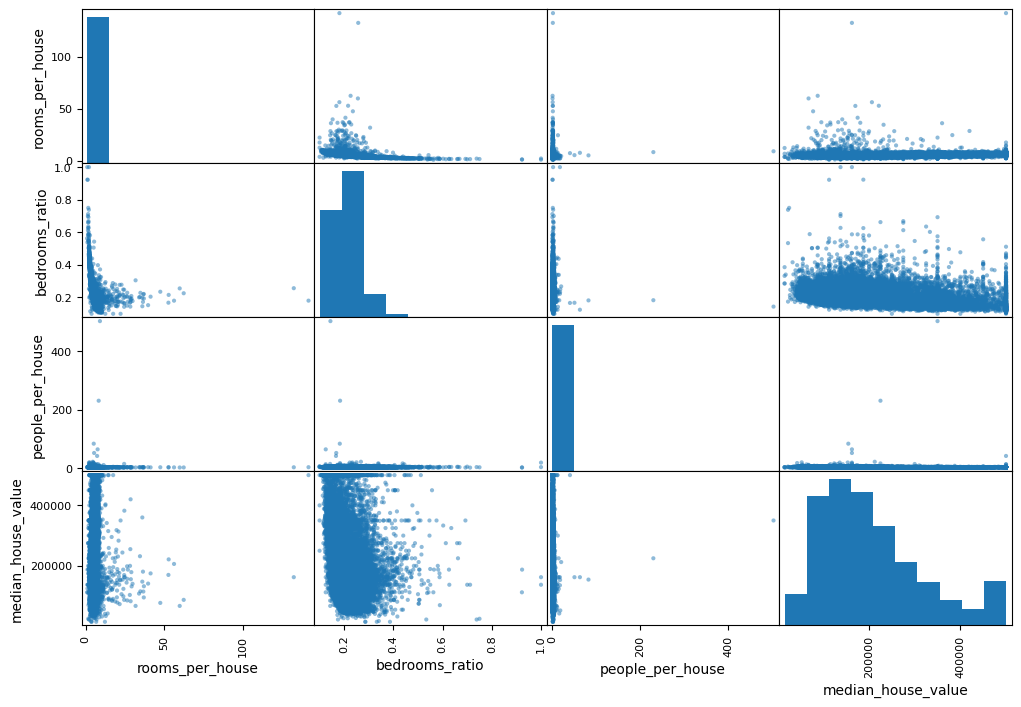

In [25]:
attributes = ["rooms_per_house", "bedrooms_ratio", "people_per_house", "median_house_value"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Above, we can find the there exist a correlation. However, we can observe some abnormal trend. For example, it is not possibile to have more than 400 people in a house or more than 100 rooms per house, so next step is cleaning the data!

# Data prepration for ML Algorithm

# Cleaning

In [26]:
# Reseting the data
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_label = strat_train_set['median_house_value'].copy()

In [27]:
# Imputation method is used for missing value
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
# Median can only be calculated for numerical attributes
housing_num = housing.select_dtypes(include=['number']) 
X = imputer.fit_transform(housing_num)


The reason SimpleImputer option is its ability to store the statistics such as *median* for this case as an object and this same imputer will be applied for test dataset to maintain the consistency. 

In [28]:
# This shows the mean for each attribute
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [29]:
# However, the output we get is numpy array so we have to convert it back
print(type(X)) # numpy.ndarray

housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

<class 'numpy.ndarray'>


## Categorical Attributes

We have **ocean_proximity** attribute which has categorical attributes. There exists different methods offered by scikit-learn, such as;
1. OrdinalEncoder: converts the n-categories in n numers.
2. OneHotEncoder: coverts the n-categoies in n x length of attribute sparse matrix.

We will use OneHotEncoder.


In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[['ocean_proximity']]) # Sparse Matrix

In [31]:
cat_encoder.categories_ # Shows the categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

We will use this encoder later when we create a ML pipeline 

## Feature Scaling and Transformation

we observed some scaling and transformation issues during correlation. Furthermore, ML algorithm doesn't perform well when using features at different scales. Gradient descent find it hard to obtain the global minima. There are two main methods widely used, 

1. min-max scalling (normalization)

> *  It is between 0 - 1
> *  sklearn library MinMaxScalar
> *  More affected by outliers

2. Standardization

> * It has mean equals to zero
> * Standard Deviation equals to 1
> * Less affected by outliers

However, before we jump into feature scaling, we have to transform our data into symmetrical distribution from heavy tail. Normally *log* is used to convert the distribution into Gaussian distribution. 


In ML projects alot of transformations and preprocessing is performed. So, it is always a better idea to make a pipeline that can easily handle such tasks. Pipelines create a sequence of transformation and out of each transformation is autometrically feed into next transformation. 

For **latitute** and **longitude** we can create a feature, that will show the distance between the most expensive areas we explored above and the surrounding districts. This will help to create different features which will help the model better predict the prices. For that purpose we will use Guassian RBF, that finds the similarity between the different location of district with the most expensive locations. KMeans clustering algorithm is used. 

In [41]:
# Program for location smiliarity
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class LocationSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters, gamma = 1.0, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self. random_state = random_state
    
    def fit(self, X, y = None, sample_weight = None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters,
                              random_state=self.random_state, n_init = 10)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_,
                           gamma=self.gamma)
    
    def get_feature_names_out(self, names = None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


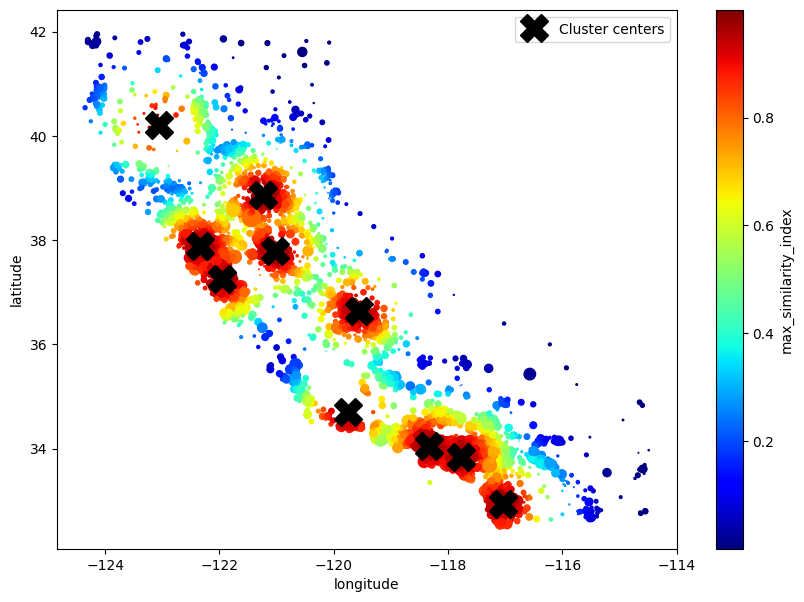

In [42]:
loc_simil = LocationSimilarity(10, 1.0, 42)
simil = loc_simil.fit_transform(housing[['latitude', 'longitude']], 
                                sample_weight = housing_label)

housing['max_similarity_index'] = simil.max(axis = 1)
housing.plot(kind = "scatter", x = "longitude", y = "latitude",
             s = housing["population"] / 100, c = "max_similarity_index",
             cmap = "jet", colorbar = True, legend = True, figsize = (10, 7))
plt.plot(loc_simil.kmeans_.cluster_centers_[:, 1], 
loc_simil.kmeans_.cluster_centers_[:, 0], linestyle="", 
color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

In [34]:
# For example imputer and sandardscalar pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# For numerical attributes
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

# For categorical attributes
cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

# Example of applying one of the pipeline
housing_num_prepared = num_pipeline.fit_transform(housing_num) # numpy array
housing_num_prepared_names = num_pipeline.get_feature_names_out()
print(housing_num_prepared[:2].round(2))
print(housing_num_prepared_names)

df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=housing_num_prepared_names,
                                       index = housing_num.index)

[[-1.42  1.01  1.86  0.31  1.37  0.14  1.39 -0.94]
 [ 0.6  -0.7   0.91 -0.31 -0.44 -0.69 -0.37  1.17]]
['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']


In [35]:
print(df_housing_num_prepared.isnull().sum())
df_housing_num_prepared

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


Above you can see, all the imputation and standardscalar transformations are performed. Following this stratergy, all the  feature engineering, data cleaning and transformation can be combined in one pipeline that will help to automate the process. Furthermore, to apply the transformation for both numerical attributes and categorical attributes we can use ColumnTranformer or make_column_transformer. 

In [36]:
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
# Chose the respective pipeline w.r.t data type
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
    )

### Recape what we have done so far!

1. Replacing the missing numerical values with *median*, and categorical values with *most-frequent.*
2. Using OneHotEncoding to convert the categorical attributes to sparse matrix.
3. Feature Engineering, **bedrooms_ratio**, **rooms_per_house** and **people_per_house**.
4. Cluster similarity feature to be added.
5. Tail-long distributions converted into Guassian-distribution using logrithim.
7. Feature standardization.

So following pipeline will account all these steps.

In [43]:
from sklearn.preprocessing import FunctionTransformer

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
)

loc_simil = LocationSimilarity(n_clusters = 10, gamma = 1.0,
random_state = 42)

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
    ("geo", loc_simil, ['latitude', 'longitude']),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
],
remainder=num_pipeline)

In [48]:
housing_prepared = preprocessing.fit_transform(housing.drop(columns="max_similarity_index"))
preprocessing.get_feature_names_out()


array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [49]:
housing_final = pd.DataFrame(housing_prepared, columns = preprocessing.get_feature_names_out(),
                             index = housing.index)

In [50]:
housing_final.head(5)

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,8.708837e-08,9.712456e-01,...,7.114441e-04,3.070969e-17,1.314047e-01,5.740031e-01,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,1.181328e-01,9.738096e-14,...,3.045359e-27,5.437838e-01,1.735342e-09,2.275194e-10,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,2.295286e-08,7.457782e-01,...,4.750719e-03,1.605970e-17,2.744847e-01,2.839978e-01,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,4.618947e-04,3.873884e-20,...,2.916178e-35,7.405721e-01,2.243339e-14,4.218649e-16,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,3.166634e-02,7.905346e-16,...,2.843975e-30,7.501278e-01,2.890866e-11,3.710912e-12,0.0,0.0,0.0,0.0,1.0,0.589800


# Select and Train Model